# Neural Networks on California Housing Data

### Imports


In [16]:
from house_value_regression import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Read in dataset

In [17]:
housing_data = pd.read_csv('housing.csv')
print(housing_data.describe().T)


                      count           mean            std         min  \
longitude           16512.0    -119.559430       2.003480   -124.3500   
latitude            16512.0      35.617896       2.134056     32.5400   
housing_median_age  16512.0      28.669331      12.615046      1.0000   
total_rooms         16512.0    2639.225654    2198.453859      2.0000   
total_bedrooms      16344.0     538.522026     425.256071      1.0000   
population          16512.0    1425.169513    1147.038029      3.0000   
households          16512.0     499.902616     385.367776      1.0000   
median_income       16512.0       3.873290       1.912350      0.4999   
median_house_value  16512.0  207251.882994  115687.033147  14999.0000   

                            25%          50%           75%          max  
longitude             -121.7825    -118.4900    -118.00000    -114.3100  
latitude                33.9300      34.2500      37.71000      41.9500  
housing_median_age      18.0000      29.0000   

In [18]:
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   median_house_value  16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB
None


### Count NAs

In [19]:
housing_na = (housing_data.isna())
na_sums = housing_na.sum(axis=0)
print(na_sums)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


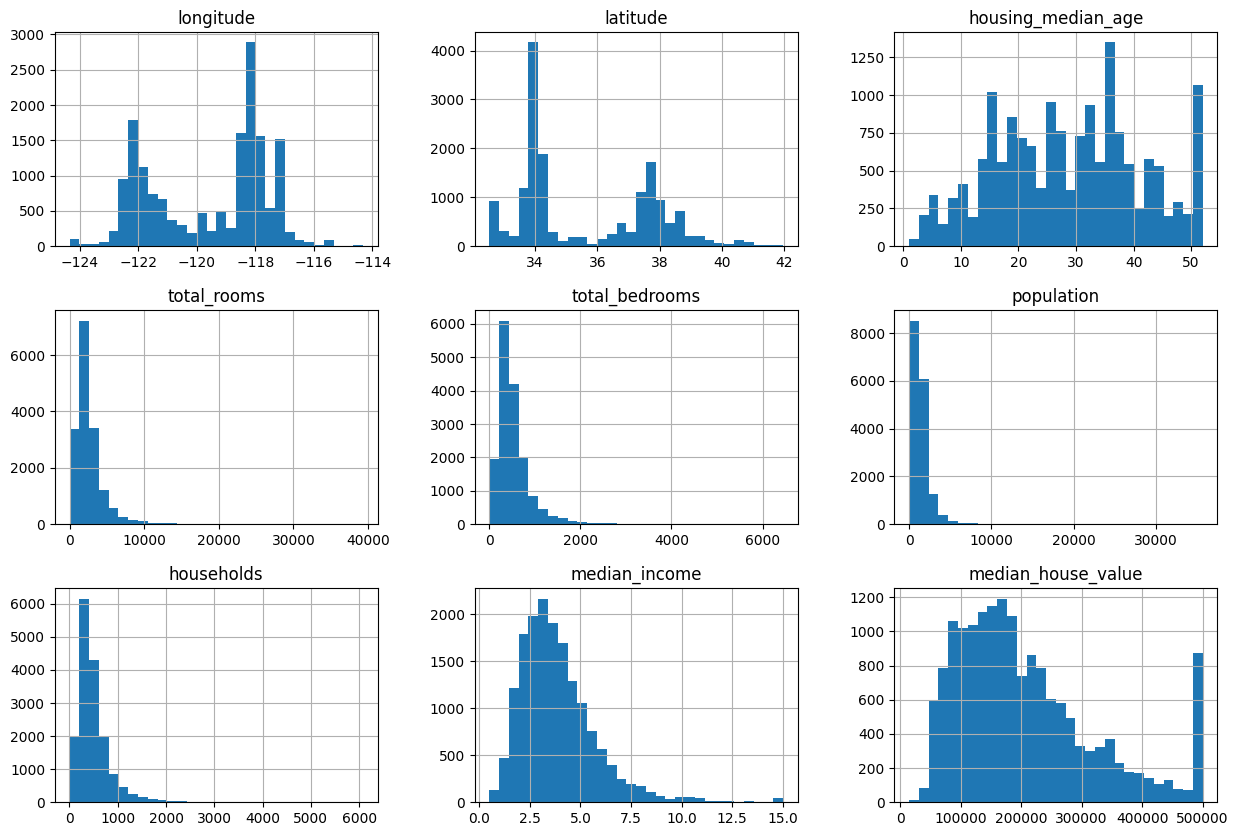

In [20]:
ax =housing_data.hist(bins=30, figsize=(15, 10))
plt.show()

### Training test split

In [21]:
output_label = "median_house_value"
# Splitting input and output
input_variables = housing_data.loc[:, housing_data.columns != output_label]
output_variables = housing_data.loc[:, [output_label]]

x_train, x_test, y_train, y_test = train_test_split(input_variables, output_variables, test_size=0.10, random_state=101)

### Train and fit the regressor

In [27]:
# Training with params
params = {'nb_epoch':  750, 'learning_rate': 1e-2, 'batch_size': 128,
              'activation': 'relu', 'layers': 2, 'neurons': 32,
              'output_activation': 'relu'}

base_regressor = Regressor(x=x_train, **params)
base_regressor.fit(x_train, y_train)

Epoch75, Loss: 62814.50945658013
Epoch150, Loss: 62335.416071175954
Epoch225, Loss: 61827.38260811403
Epoch300, Loss: 56229.00929616309
Epoch375, Loss: 54268.44167751693
Epoch450, Loss: 53407.141390458295
Epoch525, Loss: 52571.07665555871
Epoch600, Loss: 52186.84429703435
Epoch675, Loss: 51485.24811970686
Epoch750, Loss: 50791.85016869954


### Test the performance of the regressor


Regressor error: 55663.30460932769



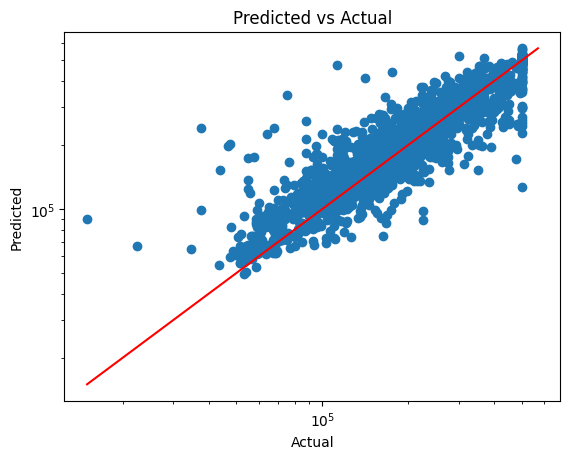

In [28]:
base_error = base_regressor.score(x_test, y_test)
print("\nRegressor error: {}\n".format(base_error))

base_predictions=base_regressor.predict(x_test)
plt.scatter(y_test,base_predictions)
plt.xscale('log'),plt.yscale('log')
y_array=y_test.to_numpy()
low_lim=min(np.min(y_array), np.min(base_predictions))
up_lim=max(np.max(y_array), np.max(base_predictions))
lims = [low_lim,up_lim]
plt.plot(lims,lims, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

### Hyperparameter Tuning

#### Code commented out as it takes too long to run!!

In [24]:
# Feel free to add more params
"""grid_params = {'nb_epoch': [500, 750, 1000], 'learning_rate': [0.1,1e-2, 1e-3, 1e-4], 'batch_size': [32, 64, 128],
          'activation': ['relu', 'tanh', 'sigmoid'], 'layers': [2, 3, 4], 'neurons': [16, 32, 64],
          'output_activation': ['relu']}

best_params = HyperParameterSearch(x_train, y_train, grid_params, verbose=3)

# Training with best params
best_regressor = Regressor(x=x_train, **best_params)
best_regressor.fit(x_train, y_train)
save_regressor(best_regressor)

# Error
error = best_regressor.score(x_test, y_test)
print("\nRegressor error: {}\n".format(error))
"""
pass

In [ ]:
best_error = best_regressor.score(x_test, y_test)
print("\nRegressor error: {}\n".format(best_error))

best_predictions=best_regressor.predict(x_test)
plt.scatter(y_test,best_predictions)
plt.xscale('log'),plt.yscale('log')
y_array=y_test.to_numpy()
low_lim=min(np.min(y_array), np.min(best_predictions))
up_lim=max(np.max(y_array), np.max(best_predictions))
lims = [low_lim,up_lim]
plt.plot(lims,lims, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual (best regressor')
plt.show()